# DATA VISUALIZATION

## Columns 29 + 30 + 32 + ... + 47

### Target Variable : Column 31 : annual_medical_cost

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('medical_insurance.csv')


#### Col 29

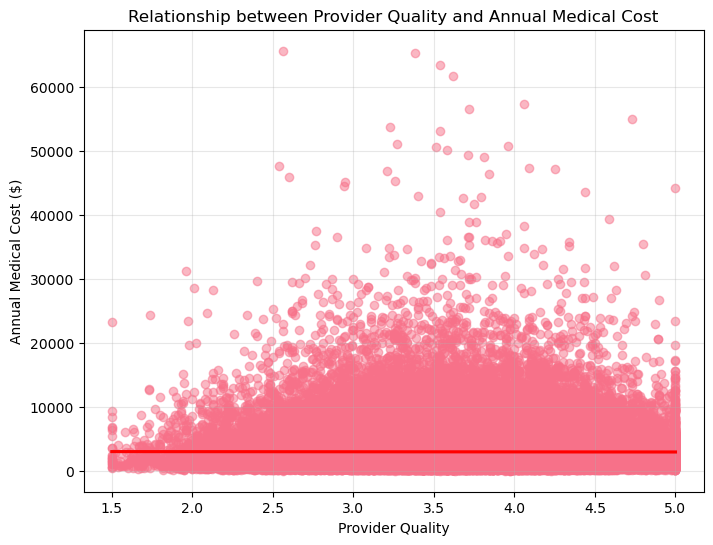

Correlation between Provider Quality and Annual Medical Cost: -0.003

PROVIDER QUALITY vs ANNUAL MEDICAL COST ANALYSIS:
NO STRONG relationship - Provider quality shows little correlation with medical costs
Costs are likely driven by other factors beyond provider quality

Correlation strength: 0.003
This relationship should be considered in the ML model for cost prediction


In [26]:
correlation = df["provider_quality"].corr(df["annual_medical_cost"])

plt.figure(figsize=(8, 6))
sns.regplot(x="provider_quality", y="annual_medical_cost", data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship between Provider Quality and Annual Medical Cost")
plt.xlabel("Provider Quality")
plt.ylabel("Annual Medical Cost ($)")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Correlation between Provider Quality and Annual Medical Cost: {correlation:.3f}")

# Analysis
print("\nPROVIDER QUALITY vs ANNUAL MEDICAL COST ANALYSIS:")

if correlation > 0.3:
    print("POSITIVE relationship - Higher quality providers are associated with higher medical costs")
    print("This suggests patients may pay more for better quality care")
elif correlation < -0.3:
    print("NEGATIVE relationship - Higher quality providers are associated with lower medical costs") 
    print("This suggests better quality care may be more efficient and cost-effective")
else:
    print("NO STRONG relationship - Provider quality shows little correlation with medical costs")
    print("Costs are likely driven by other factors beyond provider quality")

In [3]:
# Conclusion : 
   # There is no meaningful correlation between provider quality and annual medical cost.
   # Higher provider quality does not necessarily lead to higher or lower costs.

#### Col 30

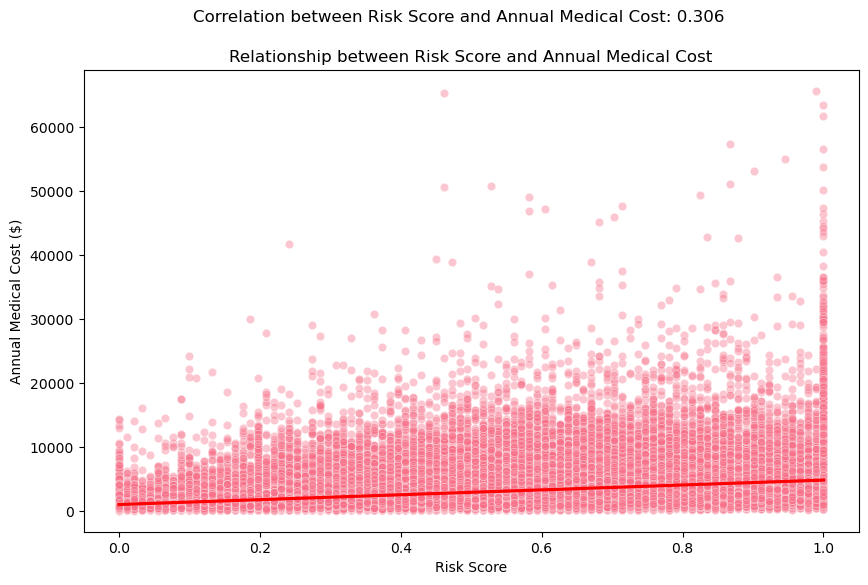

RISK SCORE vs ANNUAL MEDICAL COST ANALYSIS:
Correlation: 0.306
WEAK POSITIVE relationship - Risk score has some predictive power

ML MODEL IMPLICATION:
Risk score should be included as a key feature in the medical cost prediction model


In [25]:
corr = df['risk_score'].corr(df['annual_medical_cost'])
plt.figure(figsize=(10,6))
sns.scatterplot(x='risk_score', y='annual_medical_cost', data=df, alpha=0.4)
sns.regplot(x='risk_score', y='annual_medical_cost', data=df, scatter=False, color='red')
plt.title('Relationship between Risk Score and Annual Medical Cost')
plt.xlabel('Risk Score')
plt.ylabel('Annual Medical Cost ($)')
plt.suptitle(f'Correlation between Risk Score and Annual Medical Cost: {corr:.3f}', y=0.98)
plt.show()

# Analysis
print("RISK SCORE vs ANNUAL MEDICAL COST ANALYSIS:")
print(f"Correlation: {corr:.3f}")

if corr > 0.7:
    print("STRONG POSITIVE relationship - Risk score is an excellent predictor of medical costs")
elif corr > 0.5:
    print("MODERATE POSITIVE relationship - Risk score is a good predictor of medical costs") 
elif corr > 0.3:
    print("WEAK POSITIVE relationship - Risk score has some predictive power")
elif corr > -0.3:
    print("NO SIGNIFICANT relationship - Risk score is not a reliable predictor")
else:
    print("NEGATIVE relationship - Risk score moves opposite to costs")

print("\nML MODEL IMPLICATION:")
print("Risk score should be included as a key feature in the medical cost prediction model")

#### Financial Metrics (Cols 32 - 33)

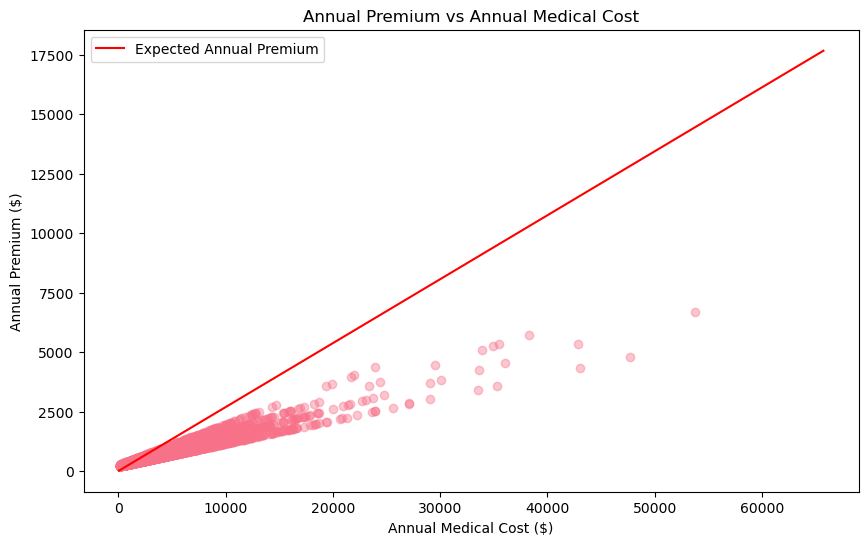

ANNUAL PREMIUM vs MEDICAL COST ANALYSIS:
DERIVED: Correlation coefficient = 0.965


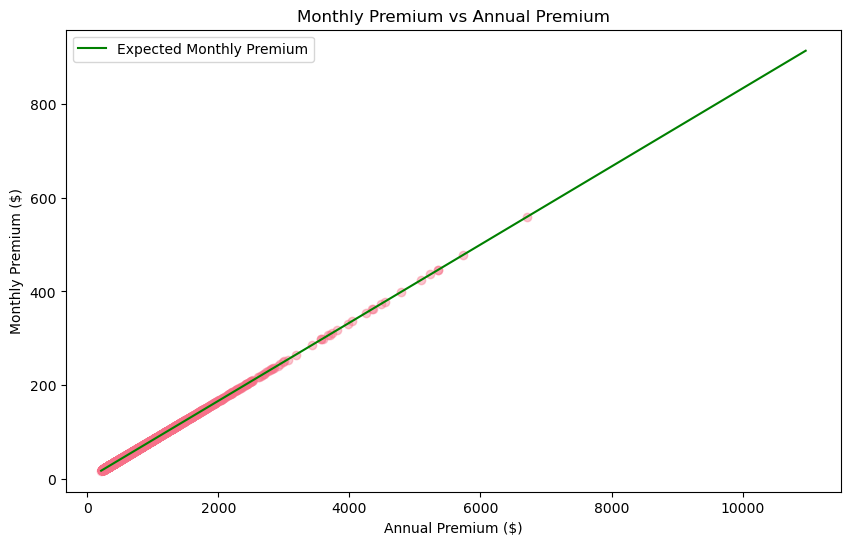


MONTHLY PREMIUM vs ANNUAL PREMIUM ANALYSIS:
DERIVED: Monthly premium accuracy ratio = 1.000

--------------------------------------------------
CONCLUSION FROM DERIVED VALUES:
--------------------------------------------------
DERIVED: premium_ratio = annual_premium / annual_medical_cost
DERIVED: correlation_annual = 0.965
DERIVED: monthly_accuracy = 1.000


In [23]:
df['premium_ratio'] = df['annual_premium'] / df['annual_medical_cost']
df['monthly_premium_ratio'] = df['monthly_premium'] / df['annual_medical_cost']
df_sample = df.sample(10000, random_state=42)

plt.figure(figsize=(10,6))
plt.scatter(df_sample['annual_medical_cost'], df_sample['annual_premium'], alpha=0.4)
x_line = [df['annual_medical_cost'].min(), df['annual_medical_cost'].max()]
y_line = [x * df['premium_ratio'].mean() for x in x_line]
plt.plot(x_line, y_line, color='red', label='Expected Annual Premium')
plt.title('Annual Premium vs Annual Medical Cost')
plt.xlabel('Annual Medical Cost ($)')
plt.ylabel('Annual Premium ($)')
plt.legend()
plt.show()

# Analysis for Plot 1
print("ANNUAL PREMIUM vs MEDICAL COST ANALYSIS:")
correlation_annual = df['annual_medical_cost'].corr(df['annual_premium'])
print(f"DERIVED: Correlation coefficient = {correlation_annual:.3f}")

plt.figure(figsize=(10,6))
plt.scatter(df_sample['annual_premium'], df_sample['monthly_premium'], alpha=0.4)
x_line = [df['annual_premium'].min(), df['annual_premium'].max()]
y_line = [x / 12 for x in x_line]
plt.plot(x_line, y_line, color='green', label='Expected Monthly Premium')
plt.title('Monthly Premium vs Annual Premium')
plt.xlabel('Annual Premium ($)')
plt.ylabel('Monthly Premium ($)')
plt.legend()
plt.show()

# Analysis for Plot 2
print("\nMONTHLY PREMIUM vs ANNUAL PREMIUM ANALYSIS:")
monthly_expected = df['annual_premium'] / 12
accuracy = (df['monthly_premium'] / monthly_expected).mean()
print(f"DERIVED: Monthly premium accuracy ratio = {accuracy:.3f}")

# Conclusion
print("\n" + "-"*50)
print("CONCLUSION FROM DERIVED VALUES:")
print("-"*50)
print(f"DERIVED: premium_ratio = annual_premium / annual_medical_cost")
print(f"DERIVED: correlation_annual = {correlation_annual:.3f}")
print(f"DERIVED: monthly_accuracy = {accuracy:.3f}")

#### Cols 34 - 36

DATA SUMMARY:
----------------------------------------
Dataset shape: (100000, 59)

Basic statistics:
       claims_count  avg_claim_amount  total_claims_paid  annual_medical_cost
count  100000.00000     100000.000000      100000.000000        100000.000000
mean        1.62178        656.512084        1377.878827          3009.451907
std         2.02982       1072.660048        2305.464687          3127.462822
min         0.00000          0.000000           0.000000            55.550000
25%         0.00000          0.000000           0.000000          1175.117500
50%         1.00000        318.015000         642.545000          2082.575000
75%         2.00000        872.215000        1795.522500          3707.957500
max        23.00000      30010.530000       72517.950000         65724.900000

Number of unique values:
claims_count        : 22 unique values
avg_claim_amount    : 53071 unique values
total_claims_paid   : 56650 unique values
annual_medical_cost : 91299 unique values

Miss

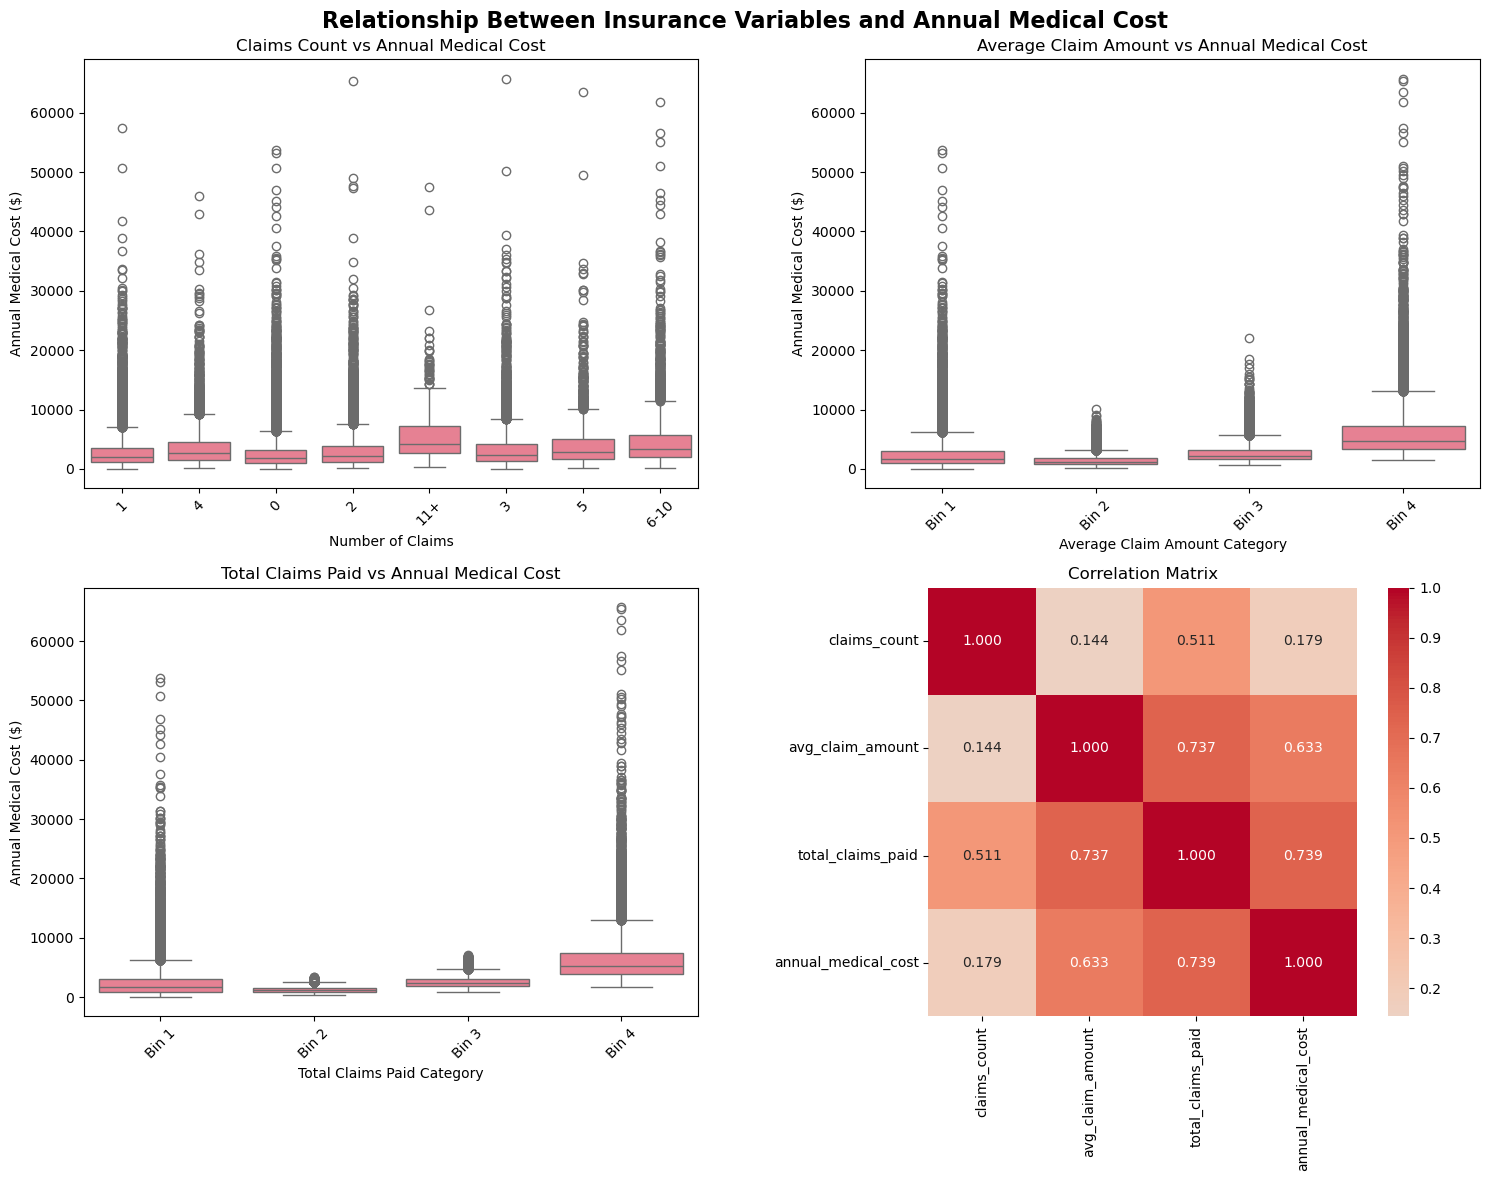


--------------------------------------------------
CORRELATION ANALYSIS WITH ANNUAL MEDICAL COST
--------------------------------------------------
total_claims_paid    :   0.739 → VERY STRONG positive correlation
avg_claim_amount     :   0.633 → STRONG positive correlation
claims_count         :   0.179 → WEAK positive correlation

--------------------------------------------------
FEATURE IMPORTANCE FOR ML MODEL
--------------------------------------------------
claims_count         - WEAK feature (corr: 0.179)
avg_claim_amount     - EXCELLENT feature (corr: 0.633)
total_claims_paid    - EXCELLENT feature (corr: 0.739)


In [16]:

plt.style.use('default')
sns.set_palette("husl")

print("DATA SUMMARY:")
print("-" * 40)
print(f"Dataset shape: {df.shape}")
print(f"\nBasic statistics:")
print(df[['claims_count', 'avg_claim_amount', 'total_claims_paid', 'annual_medical_cost']].describe())

print(f"\nNumber of unique values:")
for col in ['claims_count', 'avg_claim_amount', 'total_claims_paid', 'annual_medical_cost']:
    print(f"{col:20}: {df[col].nunique()} unique values")

print(f"\nMissing values:")
print(df[['claims_count', 'avg_claim_amount', 'total_claims_paid', 'annual_medical_cost']].isnull().sum())

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Relationship Between Insurance Variables and Annual Medical Cost', fontsize=16, fontweight='bold')

# 1. Claims Count vs Annual Medical Cost
print(f"\nClaims count unique values: {sorted(df['claims_count'].unique())}")
if df['claims_count'].nunique() > 10:
    # Group high claim counts
    df['claims_count_grouped'] = df['claims_count'].apply(lambda x: str(x) if x <= 5 else '6-10' if x <= 10 else '11+')
    sns.boxplot(data=df, x='claims_count_grouped', y='annual_medical_cost', ax=axes[0,0])
else:
    sns.boxplot(data=df, x='claims_count', y='annual_medical_cost', ax=axes[0,0])
axes[0,0].set_title('Claims Count vs Annual Medical Cost')
axes[0,0].set_xlabel('Number of Claims')
axes[0,0].set_ylabel('Annual Medical Cost ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Average Claim Amount vs Annual Medical Cost - FIXED
print(f"\nAverage claim amount range: {df['avg_claim_amount'].min():.2f} to {df['avg_claim_amount'].max():.2f}")

if df['avg_claim_amount'].nunique() > 5:
    try:
        df['avg_claim_bin'] = pd.qcut(df['avg_claim_amount'], q=5, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4', 'Q5 (High)'], duplicates='drop')
    except:
        percentiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
        bin_edges = [df['avg_claim_amount'].quantile(p) for p in percentiles]
        bin_edges = sorted(list(set(bin_edges)))
        if len(bin_edges) > 1:
            df['avg_claim_bin'] = pd.cut(df['avg_claim_amount'], bins=bin_edges, labels=[f'Bin {i+1}' for i in range(len(bin_edges)-1)], include_lowest=True)
        else:
            min_val = df['avg_claim_amount'].min()
            max_val = df['avg_claim_amount'].max()
            bins = np.linspace(min_val, max_val, 6)
            df['avg_claim_bin'] = pd.cut(df['avg_claim_amount'], bins=bins, labels=[f'Bin {i+1}' for i in range(5)])
    
    sns.boxplot(data=df, x='avg_claim_bin', y='annual_medical_cost', ax=axes[0,1])
else:
    sns.boxplot(data=df, x='avg_claim_amount', y='annual_medical_cost', ax=axes[0,1])
axes[0,1].set_title('Average Claim Amount vs Annual Medical Cost')
axes[0,1].set_xlabel('Average Claim Amount Category')
axes[0,1].set_ylabel('Annual Medical Cost ($)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Total Claims Paid vs Annual Medical Cost - FIXED
print(f"\nTotal claims paid range: {df['total_claims_paid'].min():.2f} to {df['total_claims_paid'].max():.2f}")

if df['total_claims_paid'].nunique() > 5:
    try:
        df['total_claim_bin'] = pd.qcut(df['total_claims_paid'], q=5, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4', 'Q5 (High)'], duplicates='drop')
    except:
        percentiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
        bin_edges = [df['total_claims_paid'].quantile(p) for p in percentiles]
        bin_edges = sorted(list(set(bin_edges)))
        if len(bin_edges) > 1:
            df['total_claim_bin'] = pd.cut(df['total_claims_paid'], bins=bin_edges, labels=[f'Bin {i+1}' for i in range(len(bin_edges)-1)], include_lowest=True)
        else:
            min_val = df['total_claims_paid'].min()
            max_val = df['total_claims_paid'].max()
            bins = np.linspace(min_val, max_val, 6)
            df['total_claim_bin'] = pd.cut(df['total_claims_paid'], bins=bins, labels=[f'Bin {i+1}' for i in range(5)])
    
    sns.boxplot(data=df, x='total_claim_bin', y='annual_medical_cost', ax=axes[1,0])
else:
    sns.boxplot(data=df, x='total_claims_paid', y='annual_medical_cost', ax=axes[1,0])
axes[1,0].set_title('Total Claims Paid vs Annual Medical Cost')
axes[1,0].set_xlabel('Total Claims Paid Category')
axes[1,0].set_ylabel('Annual Medical Cost ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Correlation heatmap
correlation_matrix = df[['claims_count', 'avg_claim_amount', 'total_claims_paid', 'annual_medical_cost']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', square=True, ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Analysis
print("\n" + "-" * 50)
print("CORRELATION ANALYSIS WITH ANNUAL MEDICAL COST")
print("-" * 50)
correlations = df[['claims_count', 'avg_claim_amount', 'total_claims_paid', 'annual_medical_cost']].corr()['annual_medical_cost'].sort_values(ascending=False)

for var, corr in correlations.items():
    if var != 'annual_medical_cost':
        strength = "VERY STRONG" if abs(corr) > 0.7 else "STRONG" if abs(corr) > 0.5 else "MODERATE" if abs(corr) > 0.3 else "WEAK"
        direction = "positive" if corr > 0 else "negative"
        print(f"{var:20} : {corr:7.3f} → {strength} {direction} correlation")

# Feature importance summary
print("\n" + "-" * 50)
print("FEATURE IMPORTANCE FOR ML MODEL")
print("-" * 50)

for var in ['claims_count', 'avg_claim_amount', 'total_claims_paid']:
    corr = correlations[var]
    if abs(corr) > 0.6:
        print(f"{var:20} - EXCELLENT feature (corr: {corr:.3f})")
    elif abs(corr) > 0.4:
        print(f"{var:20} - GOOD feature (corr: {corr:.3f})")
    elif abs(corr) > 0.2:
        print(f" {var:20} - MODERATE feature (corr: {corr:.3f})")
    else:
        print(f"{var:20} - WEAK feature (corr: {corr:.3f})")

#### Chronic Diseases Information (Cols 37 - 47)

DATA OVERVIEW
--------------------------------------------------
Data Types:
chronic_count               int64
hypertension                int64
diabetes                    int64
asthma                      int64
copd                        int64
cardiovascular_disease      int64
cancer_history              int64
kidney_disease              int64
liver_disease               int64
arthritis                   int64
mental_health               int64
annual_medical_cost       float64
dtype: object

Number of Unique Values:
chronic_count                 7
hypertension                  2
diabetes                      2
asthma                        2
copd                          2
cardiovascular_disease        2
cancer_history                2
kidney_disease                2
liver_disease                 2
arthritis                     2
mental_health                 2
annual_medical_cost       91299
dtype: int64

Missing Values:
chronic_count             0
hypertension              0
diabe

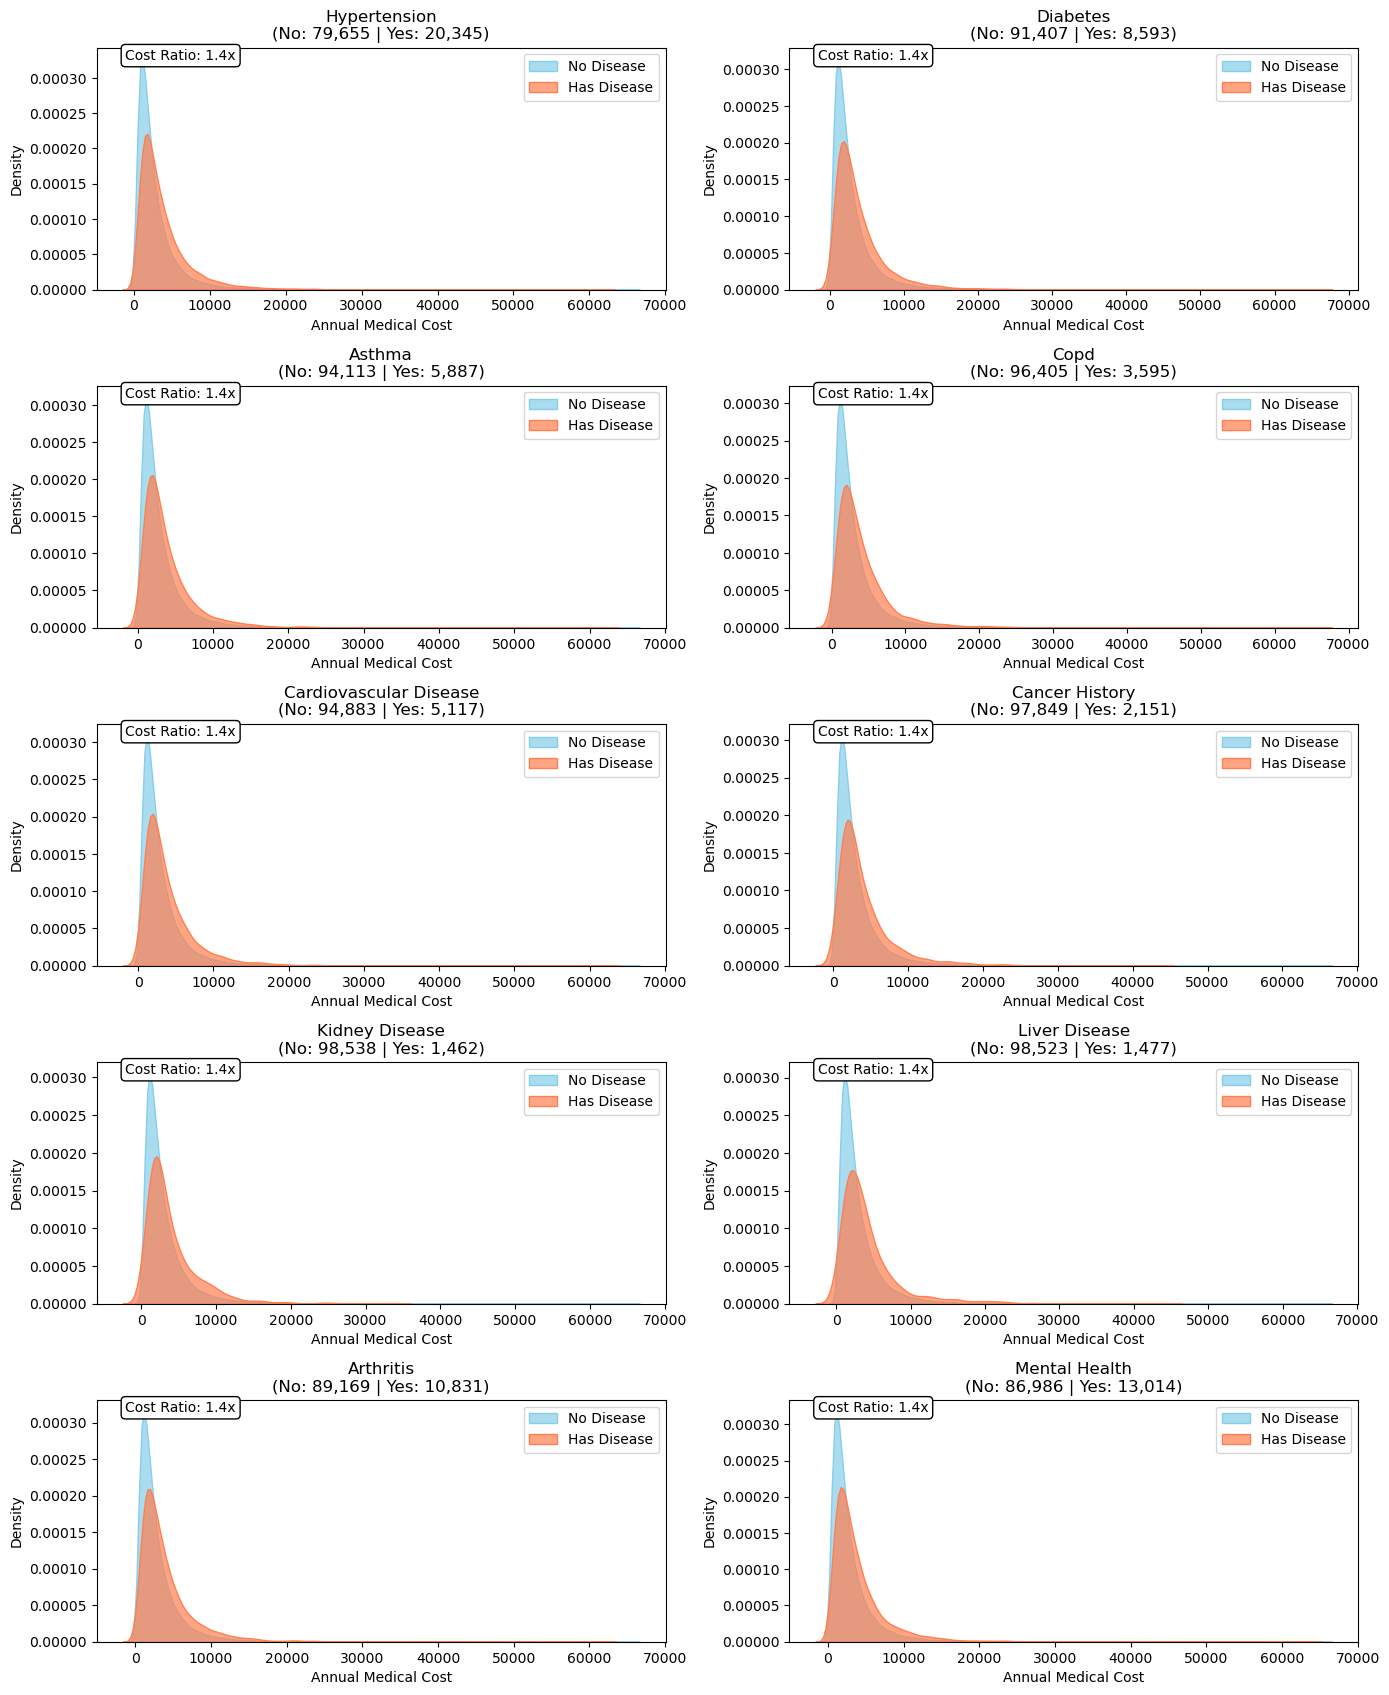



CORRELATION ANALYSIS


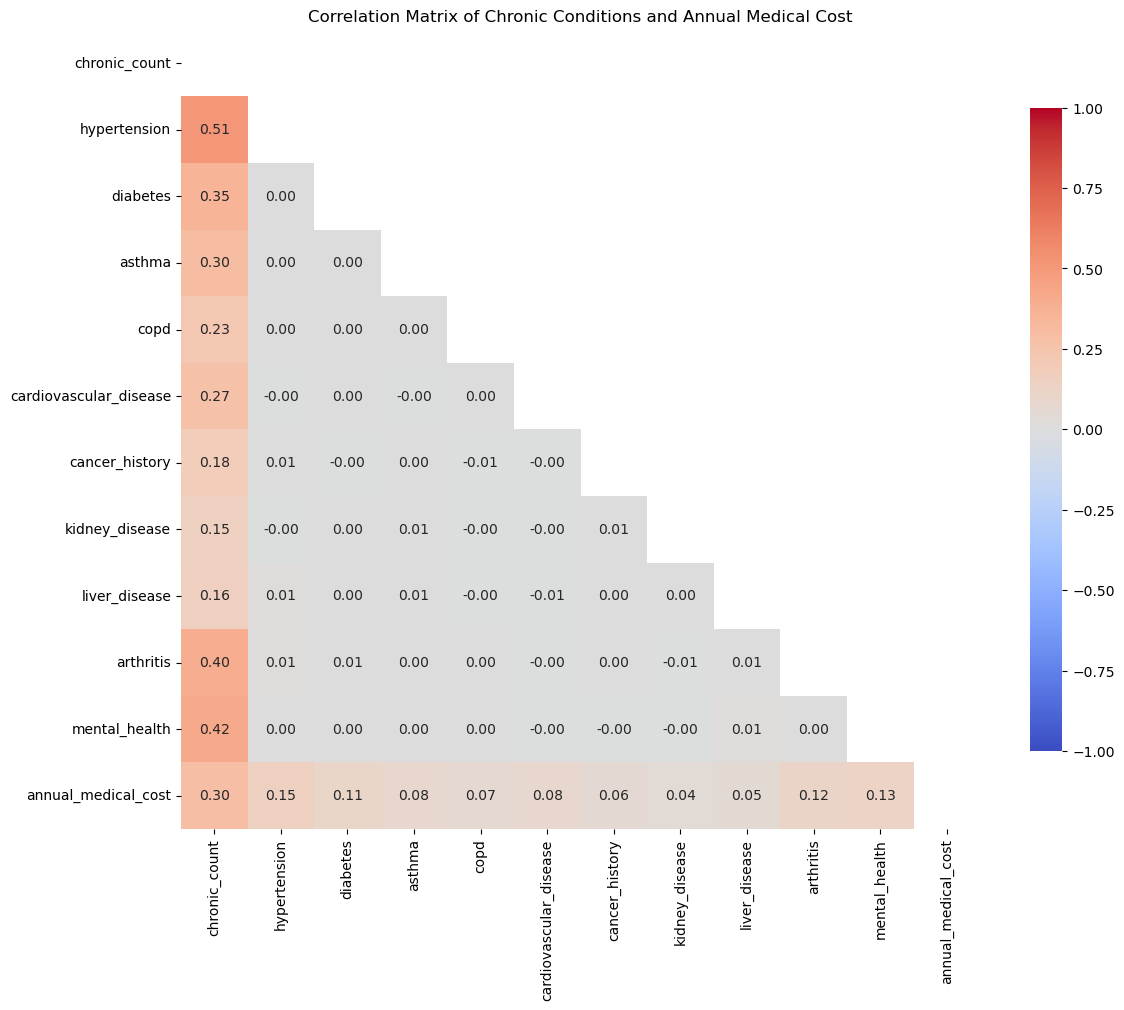


Correlation with Annual Medical Cost:
chronic_count            :  0.297 (MODERATE)
hypertension             :  0.154 (MODERATE)
mental_health            :  0.126 (MODERATE)
arthritis                :  0.115 (MODERATE)
diabetes                 :  0.107 (MODERATE)
asthma                   :  0.081 (WEAK)
cardiovascular_disease   :  0.079 (WEAK)
copd                     :  0.070 (WEAK)
cancer_history           :  0.055 (WEAK)
liver_disease            :  0.051 (WEAK)
kidney_disease           :  0.042 (WEAK)


RELATIONSHIP: NUMBER OF CHRONIC CONDITIONS VS MEDICAL COSTS
------------------------------------------------------------


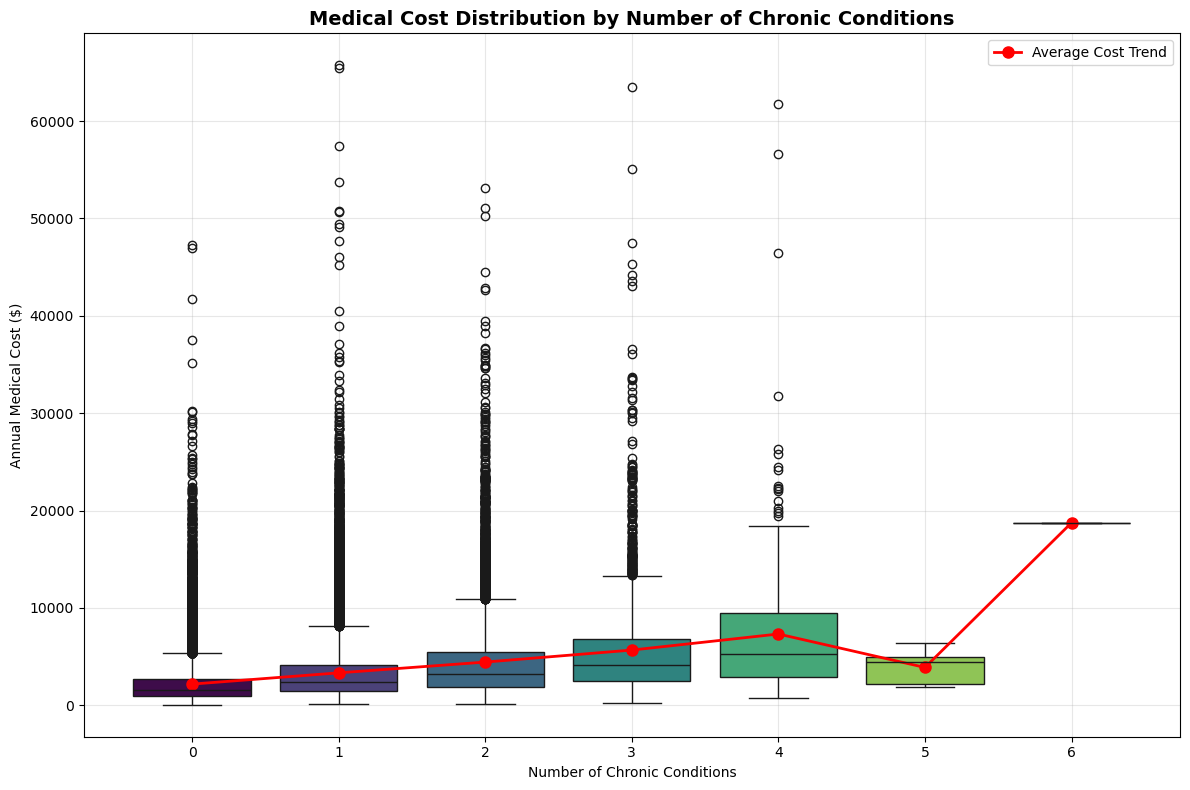


CHRONIC COUNT ANALYSIS:
Correlation: 0.297
Average cost increase per additional condition: 79.8%
Maximum chronic conditions: 6


In [28]:
features = ['chronic_count','hypertension','diabetes','asthma','copd',
            'cardiovascular_disease','cancer_history','kidney_disease',
            'liver_disease','arthritis','mental_health','annual_medical_cost']

print("DATA OVERVIEW")
print("-" * 50)
print("Data Types:")
print(df[features].dtypes)

print("\nNumber of Unique Values:")
print(df[features].nunique())

print("\nMissing Values:")
print(df[features].isnull().sum())

print("\nBasic Statistics:")
print(df[features].describe())

diseases = [f for f in features if f not in ['chronic_count','annual_medical_cost']]

print(f"\n\nEFFECT OF CHRONIC CONDITIONS ON ANNUAL MEDICAL COST")
print("-" * 60)

plt.figure(figsize=(14, 20))
for i, disease in enumerate(diseases, 1):
    plt.subplot(6, 2, i)
    has_disease = df[df[disease]==1]['annual_medical_cost']
    no_disease = df[df[disease]==0]['annual_medical_cost']
    
    sns.kdeplot(no_disease, label='No Disease', color='skyblue', fill=True, alpha=0.7)
    sns.kdeplot(has_disease, label='Has Disease', color='coral', fill=True, alpha=0.7)
    plt.title(f"{disease.replace('_', ' ').title()}\n(No: {len(no_disease):,} | Yes: {len(has_disease):,})")
    plt.xlabel("Annual Medical Cost")
    plt.ylabel("Density")
    plt.legend()
    
    cost_diff = has_disease.mean() - no_disease.mean()
    cost_ratio = has_disease.mean() / no_disease.mean()
    plt.text(0.05, 0.95, f'Cost Ratio: {cost_ratio:.1f}x', 
             transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.tight_layout()
plt.show()

print("\n\nCORRELATION ANALYSIS")
print("-" * 50)

corr = df[features].corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, 
            mask=mask, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Chronic Conditions and Annual Medical Cost")
plt.tight_layout()
plt.show()

print("\nCorrelation with Annual Medical Cost:")
cost_correlations = corr['annual_medical_cost'].sort_values(ascending=False)
for feature, corr_value in cost_correlations.items():
    if feature != 'annual_medical_cost':
        strength = "STRONG" if abs(corr_value) > 0.3 else "MODERATE" if abs(corr_value) > 0.1 else "WEAK"
        print(f"{feature:25}: {corr_value:6.3f} ({strength})")

print("\n\nRELATIONSHIP: NUMBER OF CHRONIC CONDITIONS VS MEDICAL COSTS")
print("-" * 60)

plt.figure(figsize=(12, 8))

sns.boxplot(x='chronic_count', y='annual_medical_cost', data=df, hue='chronic_count', 
            palette='viridis', legend=False)
plt.title("Medical Cost Distribution by Number of Chronic Conditions", fontsize=14, fontweight='bold')
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Annual Medical Cost ($)")

chronic_means = df.groupby('chronic_count')['annual_medical_cost'].mean()
plt.plot(range(len(chronic_means)), chronic_means.values, 'ro-', linewidth=2, markersize=8, 
         label='Average Cost Trend')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCHRONIC COUNT ANALYSIS:")
chronic_corr = df['chronic_count'].corr(df['annual_medical_cost'])
print(f"Correlation: {chronic_corr:.3f}")

cost_increase = df.groupby('chronic_count')['annual_medical_cost'].mean().pct_change().mean()
print(f"Average cost increase per additional condition: {cost_increase:.1%}")

max_conditions = df['chronic_count'].max()
print(f"Maximum chronic conditions: {max_conditions}")